# Klasifikasi Ruangan Kotor vs Bersih
https://colab.research.google.com/drive/1gUcRA2xYhSLeiSXNtqcWubnLh6x_HodN?usp=sharing#scrollTo=DRSrhuatHGi-

- Nama  : Isna Nur Amalia
- NIM   : A11.2022.14330
- KELAS : 43UG1
- Source code: https://www.kaggle.com/datasets/cdawn1/messy-vs-clean-room/code

In [23]:
import tensorflow as tf

In [24]:
# import requests

# url = 'https://github.com/dicodingacademy/assets/raw/main/ml_pemula_academy/messy-vs-clean-room.zip'
# local_file_path = '/tmp/messy_vs_clean_room.zip'

# response = requests.get(url)
# with open(local_file_path, 'wb') as file:
#     file.write(response.content)


In [26]:
# # melakukan ekstraksi pada file zip
# import zipfile,os
# local_zip = '/tmp/messy_vs_clean_room.zip'
# zip_ref = zipfile.ZipFile(local_zip, 'r')
# zip_ref.extractall('/tmp')
# zip_ref.close()

import os

base_dir = 'messy_vs_clean_room/images/'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [27]:
os.listdir('messy_vs_clean_room/images/train')

['clean', 'messy']

In [28]:
os.listdir('messy_vs_clean_room/images/val')

['clean', 'messy']

In [29]:
# membuat direktori ruangan rapi pada direktori data training
#train_clean_dir = os.path.join(train_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data training
#train_messy_dir = os.path.join(train_dir, 'messy')

# membuat direktori ruangan rapi pada direktori data validasi
#validation_clean_dir = os.path.join(validation_dir, 'clean')

# membuat direktori ruangan berantakan pada direktori data validasi
#validation_messy_dir = os.path.join(validation_dir, 'messy')

In [30]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                    rescale=1./255)

In [31]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena ini merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [32]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(512, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [34]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [35]:
history = model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=25,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/25
25/25 - 10s - loss: 0.8422 - accuracy: 0.5300 - val_loss: 0.6913 - val_accuracy: 0.5000 - 10s/epoch - 406ms/step
Epoch 2/25
25/25 - 6s - loss: 0.7218 - accuracy: 0.5100 - val_loss: 0.6835 - val_accuracy: 0.6000 - 6s/epoch - 239ms/step
Epoch 3/25
25/25 - 5s - loss: 0.7076 - accuracy: 0.5800 - val_loss: 0.6624 - val_accuracy: 0.5000 - 5s/epoch - 217ms/step
Epoch 4/25
25/25 - 5s - loss: 0.7145 - accuracy: 0.4800 - val_loss: 0.6868 - val_accuracy: 0.5000 - 5s/epoch - 210ms/step
Epoch 5/25
25/25 - 5s - loss: 0.6926 - accuracy: 0.6600 - val_loss: 0.6708 - val_accuracy: 0.5500 - 5s/epoch - 210ms/step
Epoch 6/25
25/25 - 5s - loss: 0.6753 - accuracy: 0.5800 - val_loss: 0.6239 - val_accuracy: 0.5500 - 5s/epoch - 215ms/step
Epoch 7/25
25/25 - 5s - loss: 0.6140 - accuracy: 0.6700 - val_loss: 0.9243 - val_accuracy: 0.5500 - 5s/epoch - 210ms/step
Epoch 8/25
25/25 - 5s - loss: 0.7494 - accuracy: 0.6000 - val_loss: 0.5868 - val_accuracy: 0.6500 - 5s/epoch - 219ms/step
Epoch 9/25
25/25 - 5s 

In [36]:
# Menyimpan model
model.save("model.h5")

1/1 [==============================] - 0s 365ms/step
mesi.jpg
messy


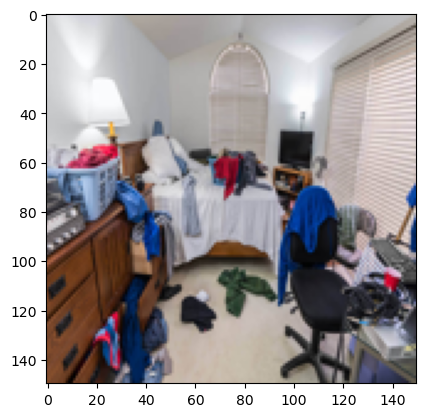

In [37]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
from PIL import Image  # Mengganti matplotlib.image dengan PIL

# Ubah baris ini jika ingin memilih gambar secara manual di VS Code
path = 'mesi.jpg'

img = Image.open(path)  # Menggunakan Image.open dari PIL
img = img.resize((150, 150))  # Mengubah ukuran gambar
plt.imshow(img)

x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])

classes = model.predict(images, batch_size=10)
print(path)
if classes[0] > 0.5:  # Ubah kondisi untuk menentukan hasil prediksi
    print('messy')
else:
    print('clean')


1/1 [==============================] - 0s 63ms/step
C:/Users/isnan/Downloads/clean.webp
messy


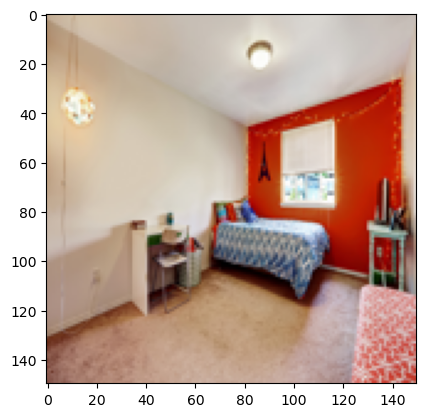

In [38]:
from tkinter import filedialog
from tkinter import Tk

root = Tk()
root.withdraw()
path = filedialog.askopenfilename()
root.destroy()

if path:
    img = Image.open(path)
    img = img.resize((150, 150))
    plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])

    classes = model.predict(images, batch_size=10)
    print(path)
    if classes[0] > 0.5:
        print('messy')
    else:
        print('clean')
else:
    print('Tidak ada gambar yang dipilih')


In [39]:
classes

array([[1.]], dtype=float32)

In [40]:
print(train_generator.class_indices)

{'clean': 0, 'messy': 1}
